<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center;color: #FFFFFF;">Predicting Breast Cancer Using Logistic Regression</h2>
</div>


<h2 style="font-size: 22px; line-height: 1.5; margin: 0; text-align: center; color: #00509E;"> Kanishk Baluni || MSc Business Analytics || 13 Oct 2024 </h2>


<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center;color: #FFFFFF;">Importing Libraries</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\BA 3RD SEMESTER\machine learning\resume project\breast_cancer.csv")

In [3]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Data Structure </h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Checking Missing Values & Other Potential Anomalies  </h2>

In [5]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
dfdescribe =[]
for i in df.columns:
    dfdescribe.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(dfdescribe, columns=['Features', 'Number of Unique Values', 'Values'])

,Features,Number of Unique Values,Values
0,Clump Thickness,10,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]"
1,Uniformity of Cell Size,10,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]"
2,Uniformity of Cell Shape,10,"[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]"
3,Marginal Adhesion,10,"[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]"
4,Single Epithelial Cell Size,10,"[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]"
5,Bare Nuclei,10,"[1, 10, 2, 4, 3, 9, 7, 5, 8, 6]"
6,Bland Chromatin,10,"[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]"
7,Normal Nucleoli,10,"[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]"
8,Mitoses,9,"[1, 5, 4, 2, 3, 7, 10, 8, 6]"
9,Class,2,"[0, 1]"


- The dataset has been analyzed for missing values and potential anomalies.
- The unique values in each feature have been examined, and it has been confirmed that all columns contain a reasonable range of unique values.
- The dataset is clean and ready for further analysis.

In [7]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


- **Central Tendencies of Features**: The mean values of several features, including `Clump Thickness` (4.44), `Uniformity of Cell Size` (3.15), and `Single Epithelial Cell Size` (3.23), indicate that the average characteristics of the samples tend to lean towards values that suggest malignancy.
- **Spread of Data**: The standard deviations for most features (e.g., `Clump Thickness` (2.82), `Mitoses` (1.73)) indicate considerable variability in the data. This may be important for distinguishing between benign and malignant cases.
- **Quartile Analysis**: A significant portion of the data is concentrated at the lower end, while the upper quartiles indicate that higher values are less frequent. This spread suggests that while there are cases with more aggressive characteristics, they are overshadowed by those with milder features.

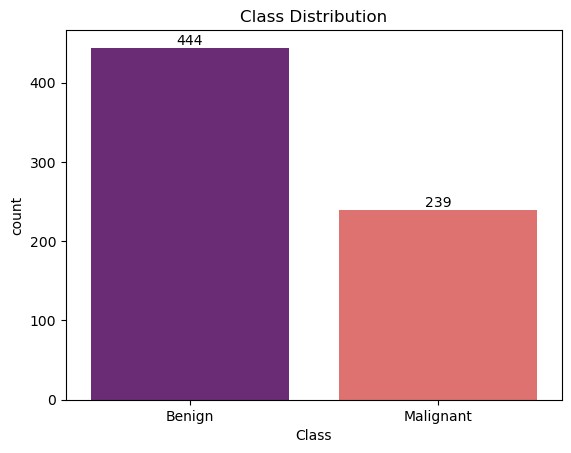

In [8]:
ax = sns.countplot(x='Class', data=df, palette='magma')

# Annotate the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution')
ax.set_xticklabels(['Benign', 'Malignant'])
plt.show()

The class distribution shows that there are many more benign cases than malignant ones, with about 65% of the data being benign and 35% malignant. This imbalance is important for logistic regression modeling because it might cause the model to be biased and make it harder to correctly identify malignant cases, leading to more false negatives.

<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; text-align: center; color: #00509E;">Correlation Matrix</h2>

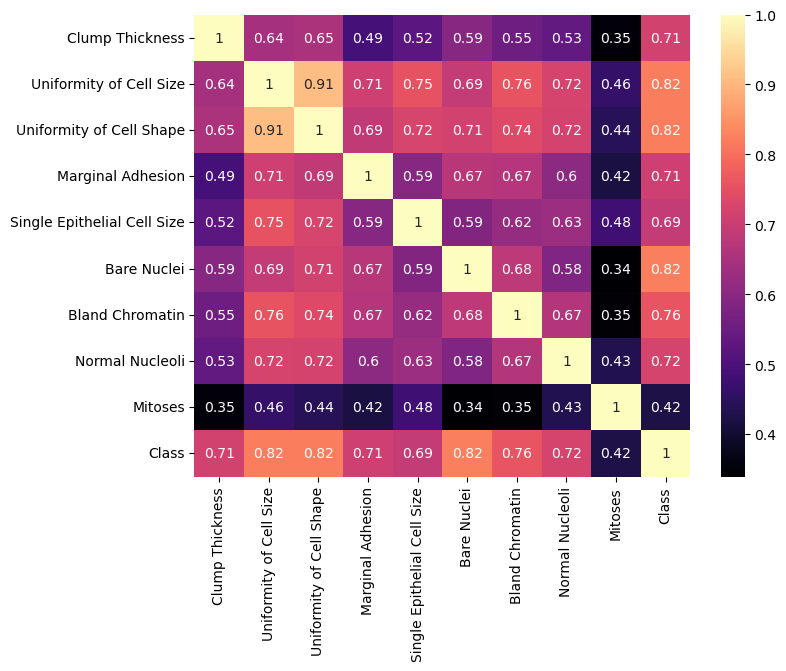

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap = 'magma')
plt.show()

- **High Correlation between Bare Nuclei and Class (0.82)**: A strong positive correlation indicates that as the number of bare nuclei increases, the likelihood of being classified as malignant also increases significantly. This suggests that bare nuclei could serve as a critical feature for predicting malignancy, highlighting its potential role as a biomarker in breast cancer diagnosis.

- **Moderate Correlation between Mitoses and Class (0.42)**: Generally increased mitotic activity can be indicative of malignancy. However,  the relatively weak correlation between mitoses and the Class variable suggests that while there is some association, it is not as strong as that observed with features like `Bare Nuclei` or `Uniformity of Cell Size`.
- **Multicollinearity**: The strong correlations among features like `Uniformity of Cell Size`, and `Uniformity of Cell Shape` suggest the potential for multicollinearity. 

<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Relationship Between Features and Target</h2>

In [10]:
target = df["Class"]
features = df.drop("Class", axis = 1)

In [11]:
for i in features:
    contingency_table = pd.crosstab(features[i], df['Class'])
    display(HTML(f"<strong>Contingency Table for {i}:</strong>"))
    print(contingency_table)

    chi2, p_value, dof, expected  = chi2_contingency(contingency_table)

    print(f"Chi2 Test for {i}")
    print(f"Chi2 Statistic: {chi2:.2f}")
    print(f"P Value: {p_value:.2f}")
    print(f"Degrees of Freedom: {dof}")

    if p_value < 0.05:
        print(f"Results: {i} shows a significant association with cancer (p value < 0.05)\n")
    else:
        print(f"Results: {i} does not show a significant association with cancer (p value >= 0.05)\n")

Class              0   1
Clump Thickness         
1                136   3
2                 46   4
3                 92  12
4                 67  12
5                 83  45
6                 15  18
7                  1  22
8                  4  40
9                  0  14
10                 0  69
Chi2 Test for Clump Thickness
Chi2 Statistic: 378.08
P Value: 0.00
Degrees of Freedom: 9
Results: Clump Thickness shows a significant association with cancer (p value < 0.05)



Class                      0   1
Uniformity of Cell Size         
1                        369   4
2                         37   8
3                         27  25
4                          8  30
5                          0  30
6                          0  25
7                          1  18
8                          1  27
9                          1   5
10                         0  67
Chi2 Test for Uniformity of Cell Size
Chi2 Statistic: 539.79
P Value: 0.00
Degrees of Freedom: 9
Results: Uniformity of Cell Size shows a significant association with cancer (p value < 0.05)



Class                       0   1
Uniformity of Cell Shape         
1                         344   2
2                          51   7
3                          30  23
4                          12  31
5                           2  30
6                           2  27
7                           2  28
8                           1  26
9                           0   7
10                          0  58
Chi2 Test for Uniformity of Cell Shape
Chi2 Statistic: 523.07
P Value: 0.00
Degrees of Freedom: 9
Results: Uniformity of Cell Shape shows a significant association with cancer (p value < 0.05)



Class                0   1
Marginal Adhesion         
1                  363  30
2                   37  21
3                   31  27
4                    5  28
5                    4  19
6                    3  18
7                    0  13
8                    0  25
9                    0   4
10                   1  54
Chi2 Test for Marginal Adhesion
Chi2 Statistic: 390.06
P Value: 0.00
Degrees of Freedom: 9
Results: Marginal Adhesion shows a significant association with cancer (p value < 0.05)



Class                          0   1
Single Epithelial Cell Size         
1                             43   1
2                            355  21
3                             28  43
4                              7  41
5                              5  34
6                              1  39
7                              2   9
8                              2  19
9                              0   2
10                             1  30
Chi2 Test for Single Epithelial Cell Size
Chi2 Statistic: 447.86
P Value: 0.00
Degrees of Freedom: 9
Results: Single Epithelial Cell Size shows a significant association with cancer (p value < 0.05)



Class          0    1
Bare Nuclei          
1            387   15
2             21    9
3             14   14
4              6   13
5             10   20
6              0    4
7              1    7
8              2   19
9              0    9
10             3  129
Chi2 Test for Bare Nuclei
Chi2 Statistic: 489.01
P Value: 0.00
Degrees of Freedom: 9
Results: Bare Nuclei shows a significant association with cancer (p value < 0.05)



Class              0   1
Bland Chromatin         
1                148   2
2                153   7
3                125  36
4                  7  32
5                  4  30
6                  1   8
7                  6  65
8                  0  28
9                  0  11
10                 0  20
Chi2 Test for Bland Chromatin
Chi2 Statistic: 453.21
P Value: 0.00
Degrees of Freedom: 9
Results: Bland Chromatin shows a significant association with cancer (p value < 0.05)



Class              0   1
Normal Nucleoli         
1                391  41
2                 30   6
3                 11  31
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  3  20
9                  0  15
10                 0  60
Chi2 Test for Normal Nucleoli
Chi2 Statistic: 416.63
P Value: 0.00
Degrees of Freedom: 9
Results: Normal Nucleoli shows a significant association with cancer (p value < 0.05)



Class      0    1
Mitoses          
1        431  132
2          8   27
3          2   31
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14
Chi2 Test for Mitoses
Chi2 Statistic: 191.97
P Value: 0.00
Degrees of Freedom: 8
Results: Mitoses shows a significant association with cancer (p value < 0.05)



All of the features show a significant association with the target variable (`Class`) as the p-values for all tests are less than 0.05. This means that each feature contributes valuable information in distinguishing between benign and malignant cases. Features like `Uniformity of Cell Size`, `Uniformity of Cell Shape`, `Bare Nuclei`, and `Bland Chromatin` show particularly strong associations and may be critical in predictive models for breast cancer classification.

<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Train Test Split</h2>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.05, random_state=1)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (648, 9) (648,)
Test set: (35, 9) (35,)


<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Logistic Regression Model</h2>

$$\textbf{The mathematical representation of the model is:}$$

$$ P\text{(Class = 1∣X)} = \frac{1}{1 + e^{-Z}} \quad \text{where} \quad Z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 .... + \beta_n X_n $$

In [13]:
# Since all features are already in the range 1 to 10, no further scaling is performed before fitting a logistic regression model.
# The regression is fitted and the results are obtained using Statsmodels, while predictions are made using Scikit-learn, as it is found to provide better results.

X_train_with_constant = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_with_constant).fit()

summary = model.summary()
print(summary) 

# Calculate odds ratios
odds_ratios = np.exp(model.params)
print(pd.DataFrame({'Odds Ratio': odds_ratios}).sort_values(by='Odds Ratio', ascending=False))

Optimization terminated successfully.
         Current function value: 0.074846
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  648
Model:                          Logit   Df Residuals:                      638
Method:                           MLE   Df Model:                            9
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                  0.8843
Time:                        23:29:35   Log-Likelihood:                -48.501
converged:                       True   LL-Null:                       -419.05
Covariance Type:            nonrobust   LLR p-value:                1.006e-153
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.8005      1.168     -8.389      0.000  

- The coefficients ($\beta_i$) represent the log odds of the target variable (cancer) for a unit increase in the corresponding feature.
- The logistic regression results generally aligns with earlier interpretations, confirming that features such as `Clump Thickness`, `Bland Chromatin` and `Bare Nuclei` are strong predictors of cancer. 
- The weak correlation of `Mitoses`, previously noted, is consistent with its borderline significance in the logistic regression model(p value = 0.054). While it shows the most predictive power (odds ratio = 1.78), it's less robust compared to other features. 
- Some variables that were significant in the chi-square tests (e.g., `Uniformity of Cell Size`) are not significant in the logistic model, possibly due to multicollinearity.
- Odds Ratio > 1: Indicates that the predictor increases the likelihood of malignancy (e.g., `Mitoses`, `Clump Thickness`).
- Odds Ratio < 1: Indicates that the predictor decreases the likelihood of malignancy (e.g., `Single Epithelial Cell Size`).

<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; text-align: center; color: #00509E;">Train Results</h2>

$$\textbf{McFadden's R-squared:}$$
$$R^2 = 1- \frac{\text{log-likelihood of the model with predictors}}{\text{log-likelihood of the model without predictors}}$$


In [14]:
# Log-likelihood of the fitted and null model
llf = model.llf
llnull = model.llnull

# Pseudo R-squared
pseudo_r2 = 1 - (llf / llnull)
print(f"Pseudo R-squared (McFadden's R-squared): {pseudo_r2:.3f}")

Pseudo R-squared (McFadden's R-squared): 0.884


$$\textbf{Hypothesis Testing}$$

$$
H_0: \text{All slope coefficients are equal to zero} \quad (\beta_1 = \beta_2 = \ldots = \beta_k = 0)
$$

$$
H_1: \text{Not all slope coefficients are equal to zero} \quad (\text{At least one } \beta_i \neq 0 \quad \text{for } i = 1, 2, \ldots, k)
$$


$$
\text{LR Test Value} = 2 \times (\text{llf} - \text{llnull})
$$

$$
\text{LR Test Value} = \chi^2
$$

$$
\text{P-value} = 1 - \text{CDF}(\chi^2, df)
$$

In [15]:
# Likelihood Ratio (LR) Test value
lr_test_value = 2 * (llf - llnull)

# Degrees of freedom for the LR test
df = model.df_model

# Chi-square test statistic and p-value
chi_square_statistic = lr_test_value
p_value = 1 - stats.chi2.cdf(chi_square_statistic, df)

# Output the results
print("Likelihood Ratio Test Results")
print("================================")
print(f"LR Test value: {lr_test_value:.3f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.3f}")

# Print the results
if p_value < 0.05:
    print("The model with predictors significantly improves the fit.")
else:
    print("The model with predictors does not significantly improve the fit.")

Likelihood Ratio Test Results
LR Test value: 741.095
Degrees of Freedom: 9.0
P-value: 0.000
The model with predictors significantly improves the fit.


$$ \textbf{Evaluation Metrics} $$

   $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

   $$ \text{Precision} = \frac{TP}{TP + FP} $$

   $$ \text{Recall} = \frac{TP}{TP + FN} $$

   $$ \text{F1 Score} = \frac{1}{\frac{1}{\text{Recall}} + \frac{1}{\text{Precision}}} $$


In [16]:
clf = LogisticRegression(max_iter = 100)
clf.fit(X_train,y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        display(HTML(f"<strong> Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f} % <strong>"))
        print("________________________________________________________________________")
        display(HTML("<strong>Classification Report:</strong>"))
        print(clf_report)
        print("________________________________________________________________________")
        display(HTML(f"<strong> Confusion Matrix: \n <strong>"))
        print(confusion_matrix(y_train, pred))
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        display(HTML(f"<strong> Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f} % <strong>"))
        print("________________________________________________________________________")
        display(HTML("<strong>Classification Report:</strong>"))
        print(clf_report)
        print("________________________________________________________________________")
        display(HTML(f"<strong> Confusion Matrix: \n <strong>"))
        print(confusion_matrix(y_test, pred))

In [17]:
print_score(clf, X_train, y_train, X_test, y_test, train=True) 

Train Result:


________________________________________________________________________


                    0           1  accuracy   macro avg  weighted avg
precision    0.976303    0.955752  0.969136    0.966028      0.969136
recall       0.976303    0.955752  0.969136    0.966028      0.969136
f1-score     0.976303    0.955752  0.969136    0.966028      0.969136
support    422.000000  226.000000  0.969136  648.000000    648.000000
________________________________________________________________________


[[412  10]
 [ 10 216]]


- With an accuracy of nearly 97%, the model performs well on the training data. However, the relatively small number of false negatives (10) suggests that the model might be overfitting (fitting the training data too well and possibly not generalizing to new data) to the training data, especially given the class imbalance.
- In disease detection, the focus is typically on minimizing false negatives because the cost of failing to detect a disease is much higher than incorrectly predicting a disease. Recall for malignant cases indicates that 95.6% of all actual malignant cases are correctly classified.
- For both classes, the F1-scores are around 97.63% and 95.57%, indicating a good balance between precision and recall. 
- True Negatives (TN): The model correctly predicted 412 cases as non-cancerous when they were indeed non-cancerous.
- False Positives (FP): The model predicted 10 cases as cancerous, but they were actually non-cancerous (false alarms).
- False Negatives (FN): The model predicted 10 cases as non-cancerous, but they were actually cancerous (missed detections).
- True Positives (TP): The model correctly predicted 216 cases as cancerous when they were indeed cancerous.

<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; text-align: center; color: #00509E;">Test Results</h2>

In [18]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) 

Test Result:


________________________________________________________________________


                   0          1  accuracy  macro avg  weighted avg
precision   0.956522   1.000000  0.971429   0.978261      0.972671
recall      1.000000   0.923077  0.971429   0.961538      0.971429
f1-score    0.977778   0.960000  0.971429   0.968889      0.971175
support    22.000000  13.000000  0.971429  35.000000     35.000000
________________________________________________________________________


[[22  0]
 [ 1 12]]


- Given that the test accuracy is higher, coupled with the earlier training accuracy, the model may not be robust and might be overfitting.
- The confusion matrix shows only one false negative, suggesting a strong performance on malignant cases; however, the model’s ability to generalize still needs to be tested across various unseen datasets.

<div style="background-color: #FF7268; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2);padding: 5px;">
    <h2 style="font-size: 28px; margin: 0; text-align: center; color: #FFFFFF;"></h2>
</div>

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Analysis of Results</h2>

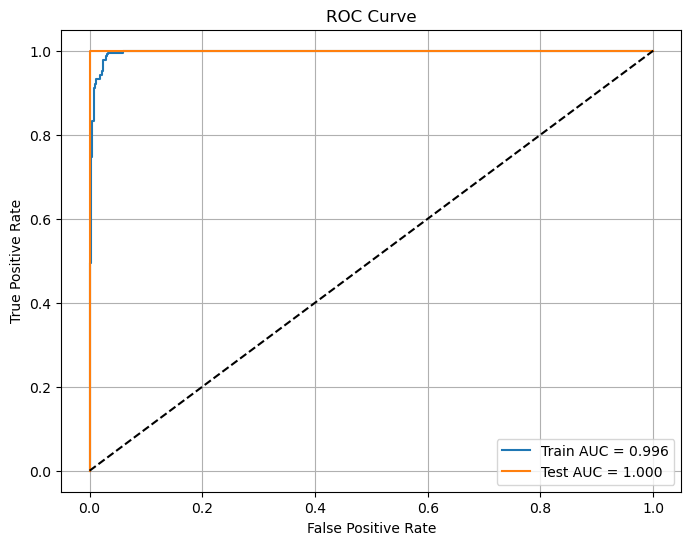

In [19]:
# Get probabilities for ROC Curve
y_train_proba = clf.predict_proba(X_train)[:, 1]
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ROC Curve for train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)

# ROC Curve for test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Plotting the ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.3f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

- The AUC (Area Under the Curve) for the training set is 0.996, which is very close to 1.
- The AUC for the test set is 1.000, which indicates perfect classification on the test data.
- This suggests that the model is overfitting. 

<h2 style="font-size: 20px; margin: 0; line-height: 1.3; text-align: center; color: #00509E;">Improvements to Better Predict Cancer</h2>

- Incorporate More Features: Adding more relevant features could enhance the model's predictive power. For example, incorporating genetic information.
- Resampling Techniques: Implementing techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class can help balance the dataset, which may improve the model’s ability to detect malignant cases.
- Try Different Algorithms: Experimenting with other machine learning algorithms can yield better performance. Some alternatives include:
    - Random Forest: This ensemble method can handle nonlinear relationships and interactions better than logistic regression.
    - Support Vector Machine (SVM): SVMs can be effective in high-dimensional spaces and can help find the optimal separating hyperplane for classification tasks.
    - Gradient Boosting Machines (GBM): Models like XGBoost or LightGBM can improve performance by combining weak learners to create a robust model.
    - Neural Networks: Deep learning models can capture complex patterns in large datasets, although they require more data and computational resources.
- Cross-Validation: Implementing k-fold cross-validation can provide a better estimate of the model's generalization ability and help identify overfitting issues. It allows for a more robust evaluation of the model by testing it against various subsets of the data.
- Hyperparameter Tuning: Optimizing hyperparameters using techniques such as grid search or random search can improve the model’s performance by finding the best configurations for the chosen algorithms.